<a href="https://colab.research.google.com/github/Arifullah007/DopaVox/blob/main/DopaVox_model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data
import pandas as pd

data = pd.read_csv("parkinsons.data")
data.head()


--2025-11-13 19:56:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘parkinsons.data’

parkinsons.data         [ <=>                ]  39.74K  --.-KB/s    in 0.05s   

2025-11-13 19:56:41 (838 KB/s) - ‘parkinsons.data’ saved [40697]



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data.drop(columns=['name','status'])
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9487179487179487


In [3]:
import joblib
joblib.dump(model, 'parkinsons_model.pkl')


['parkinsons_model.pkl']

In [4]:
# >>> RUN THIS FIRST: pins and installs (Colab)
!pip install -q scikit-learn==1.6.1 librosa joblib shap matplotlib seaborn soundfile

# Verify versions (optional)
import sklearn, librosa, joblib, shap
print("sklearn", sklearn.__version__)
print("librosa", librosa.__version__)


sklearn 1.6.1
librosa 0.11.0


In [5]:
# === STEP 2: Train pipeline and save pipeline.pkl ===

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
import pandas as pd
import numpy as np

# If `data` is already in the notebook (you loaded parkinsons.data earlier),
# we use it. Otherwise uncomment the load line below and run.
# data = pd.read_csv("parkinsons.data")

# Prepare features and labels
X = data.drop(columns=['name','status'])
y = data['status']

# Split: keep random_state for reproducibility, stratify to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Build pipeline: scaler + classifier
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Save pipeline and the test set (so we can evaluate later)
joblib.dump(pipeline, "pipeline.pkl")
joblib.dump((X_test, y_test), "test_data.pkl")

print("Done — saved pipeline.pkl and test_data.pkl")


Done — saved pipeline.pkl and test_data.pkl


Accuracy:  0.9231
Precision: 0.9333
Recall:    0.9655
F1 Score:  0.9492

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



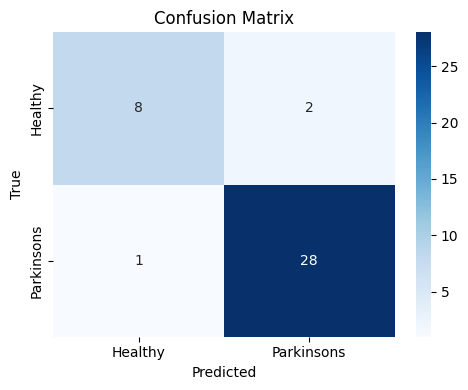

✅ Saved confusion_matrix.png


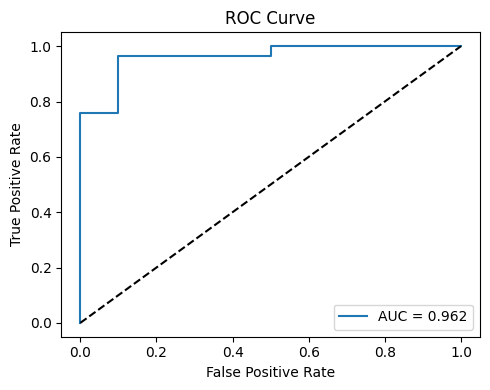

✅ Saved roc_curve.png


In [6]:
# === STEP 3: Evaluation & Plots ===
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load trained model & test data
pipeline = joblib.load("pipeline.pkl")
X_test, y_test = joblib.load("test_data.pkl")

# Make predictions
y_pred = pipeline.predict(X_test)
y_prob = None
if hasattr(pipeline, "predict_proba"):
    y_prob = pipeline.predict_proba(X_test)[:, 1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy','Parkinsons'], yticklabels=['Healthy','Parkinsons'])
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=150)
plt.show()
print("✅ Saved confusion_matrix.png")

# --- ROC Curve ---
if y_prob is not None:
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.title("ROC Curve"); plt.legend()
    plt.tight_layout()
    plt.savefig("roc_curve.png", dpi=150)
    plt.show()
    print("✅ Saved roc_curve.png")


✅ Detected scaler key: scaler
✅ Detected model  key: clf


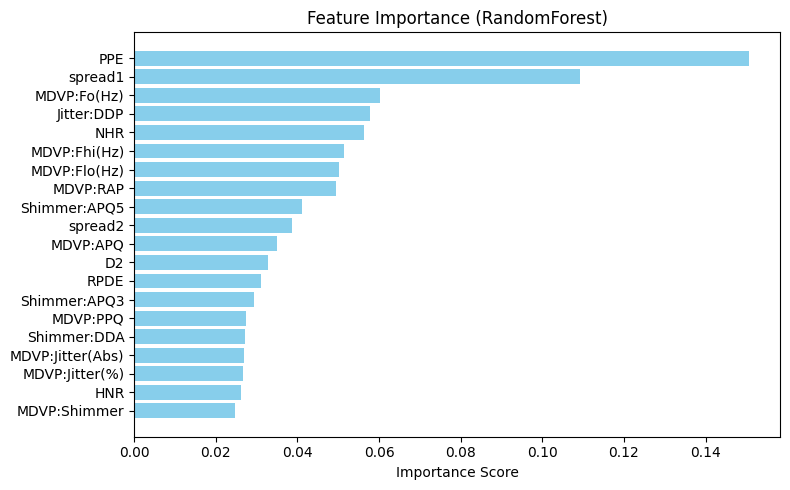

✅ Saved feature_importance.png


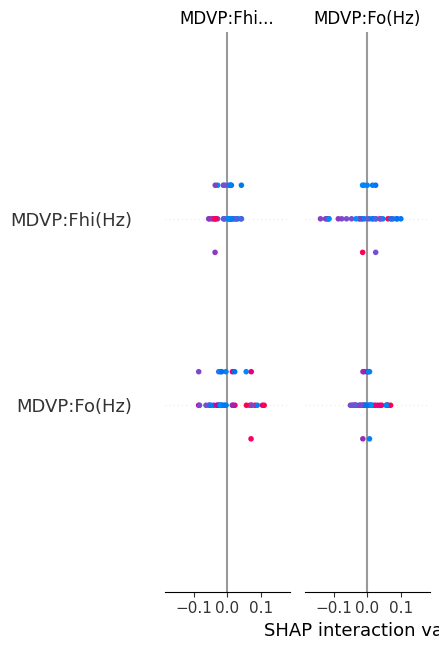

✅ Saved shap_summary.png


In [7]:
# === STEP 4 (fixed): Feature Importance + SHAP with scaled data ===
import joblib, shap, numpy as np, pandas as pd
import matplotlib.pyplot as plt

pipeline = joblib.load("pipeline.pkl")
X_test, y_test = joblib.load("test_data.pkl")

# Get feature names
try:
    feature_names = list(X_test.columns)
except Exception:
    feature_names = [f"Feature {i}" for i in range(X_test.shape[1])]

# --- Find keys for scaler and model inside the pipeline ---
scaler_key = None
model_key  = None
for k, step in pipeline.named_steps.items():
    from sklearn.base import TransformerMixin, ClassifierMixin
    if scaler_key is None and isinstance(step, TransformerMixin):
        # first transformer is our scaler
        scaler_key = k
    if model_key is None and isinstance(step, ClassifierMixin):
        model_key = k

print(f"✅ Detected scaler key: {scaler_key}")
print(f"✅ Detected model  key: {model_key}")

scaler = pipeline.named_steps[scaler_key] if scaler_key else None
model  = pipeline.named_steps[model_key]

# --- Scale X_test exactly like the pipeline does ---
if scaler is not None:
    Xs = scaler.transform(X_test)
else:
    Xs = np.asarray(X_test)

# Keep names by wrapping scaled array in a DataFrame
Xs_df = pd.DataFrame(Xs, columns=feature_names)

# ===== 1) Feature importance (for tree models) =====
if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
    order = np.argsort(importances)[::-1]
    topN = min(len(importances), 20)

    plt.figure(figsize=(8,5))
    plt.barh(range(topN), importances[order[:topN]][::-1], color="skyblue")
    plt.yticks(range(topN), [feature_names[i] for i in order[:topN]][::-1])
    plt.xlabel("Importance Score"); plt.title("Feature Importance (RandomForest)")
    plt.tight_layout(); plt.savefig("feature_importance.png", dpi=150); plt.show()
    print("✅ Saved feature_importance.png")
else:
    print("ℹ️ Model has no feature_importances_. Skipping that plot.")

# ===== 2) SHAP summary on the scaled data =====
try:
    explainer = shap.TreeExplainer(model)
    # Use a sample to keep it fast
    sample = Xs_df.sample(min(200, len(Xs_df)), random_state=42)
    shap_values = explainer.shap_values(sample.values)

    # For binary RF, shap_values is a list [class0, class1]; use class1
    sv = shap_values[1] if isinstance(shap_values, list) else shap_values

    shap.summary_plot(sv, sample, plot_type="bar", show=False)
    plt.tight_layout(); plt.savefig("shap_summary.png", dpi=150); plt.show()
    print("✅ Saved shap_summary.png")
except Exception as e:
    print("⚠️ SHAP failed, will proceed without it:", type(e).__name__, e)
